## LGD Model

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('loan_data/lgd_preprocessed_data.csv', index_col=0)
data1 = pd.read_csv('loan_data/lgd_preprocessed_data1.csv', index_col=0)

In [3]:
pd.options.display.max_columns=None

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade_freq,sub_grade_freq,home_ownership_freq,purpose_freq,addr_state_freq,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w,recovery_rate,CCF,recovery_rate_0_1
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0,12069,2441,20258,438,1313,0,1,0,1,0,0.046832,0.817416,1
8,1071795,1306957,5600,5600,21.28,152.39,F,F2,OWN,40000.0,Source Verified,Charged Off,small_business,958xx,CA,5.55,0.0,2.0,0.0,0.0,11.0,0.0,13.0,f,162.02,294.94,189.06,0.0,5600.0,4,60,164.0,72.0,2778,600,3785,1394,7011,0,1,0,1,0,0.033761,0.971068,1
9,1071570,1306721,5375,5375,12.69,121.45,B,B5,RENT,15000.0,Verified,Charged Off,other,774xx,TX,18.08,0.0,0.0,0.0,0.0,2.0,0.0,3.0,f,673.48,533.42,269.29,0.0,5375.0,0,60,159.0,72.0,9242,2045,20258,2892,2883,0,0,1,1,0,0.050100,0.874701,1
12,1064687,1298717,9000,9000,13.49,305.38,C,C1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,245xx,VA,10.08,0.0,1.0,0.0,0.0,4.0,0.0,9.0,f,1256.14,570.26,444.30,0.0,9000.0,0,36,164.0,72.0,12069,2363,20258,26127,1348,0,1,0,1,0,0.049367,0.860429,1
14,1069057,1303503,10000,10000,10.65,325.74,B,B2,RENT,100000.0,Source Verified,Charged Off,other,951xx,CA,7.06,0.0,2.0,0.0,0.0,14.0,0.0,29.0,f,5433.47,1393.42,645.10,0.0,10000.0,3,36,319.0,72.0,9242,1554,20258,2892,7011,0,1,0,1,0,0.064510,0.456653,1


In [5]:
data.shape, data1.shape

((43236, 46), (43236, 162))

### Splitting the data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#data 1
X_train, X_test, y_train, y_test = train_test_split(data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                   data['recovery_rate_0_1'], random_state=42, stratify=data['recovery_rate_0_1'])

In [8]:
#data 2
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                   data1['recovery_rate_0_1'], random_state=42, stratify=data1['recovery_rate_0_1'])

In [9]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq', 'total_rev_hi_lim',
       'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
       'mnths_since_issue_date', 'grade_freq', 'sub_grade_freq',
       'home_ownership_freq', 'purpose_freq', 'addr_state_freq',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'initial_list_status:f', 'initial_list_status:w', 'recovery_rate',
       'CCF', 'recovery_rate_0_1'],
      dtype='object')

In [10]:
data_features_all = [
'funded_amnt', 'int_rate', 'installment', 'annual_inc',
'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
'mnths_since_issue_date', 'grade_freq', 'sub_grade_freq',
'home_ownership_freq', 'purpose_freq', 'addr_state_freq', 'initial_list_status:w', 'initial_list_status:f',
'verification_status:Not Verified', 'verification_status:Source Verified', 'verification_status:Verified'
]

data_ref_cat = [
'verification_status:Verified',
'initial_list_status:f'
]

In [11]:
data1.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq',
       'total_rev_hi_lim', 'emp_length_int', 'term_int',
       'earliest_cr_line_mnths', 'mnths_since_issue_date', 'grade:A',
       'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3', 'sub_grade:A4',
       'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2', 'sub_grade:B3',
       'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1', 'sub_grade:C2',
       'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5', 'sub_grade:D1',
       'sub_grade:D2', 'sub_grade:D3', 'sub_g

In [12]:
data1_features_all = [
'funded_amnt', 'int_rate', 'installment', 'annual_inc',
'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
'mnths_since_issue_date', 'initial_list_status:f', 'initial_list_status:w',
'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE', 'home_ownership:OTHER', 'home_ownership:OWN', 'home_ownership:RENT',
'verification_status:Not Verified', 'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation',
'purpose:educational', 'purpose:home_improvement', 'purpose:house',
'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
'purpose:other', 'purpose:renewable_energy',
'purpose:small_business', 'purpose:vacation', 'purpose:wedding', 'total_rev_hi_lim'
]

data1_ref_cat = [
'grade:G', 'home_ownership:RENT', 'purpose:credit_card', 'initial_list_status:f'
]

In [13]:
X_train = X_train[data_features_all]
X_train1 = X_train1[data1_features_all]

In [14]:
X_train1.corr()

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,initial_list_status:f,initial_list_status:w,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,total_rev_hi_lim
funded_amnt,1.000000,0.273175,0.951217,0.466398,0.050126,0.026586,-0.019580,0.001760,-0.070632,0.214219,-0.052266,0.269018,0.023346,0.387513,0.163526,0.448341,0.158793,-0.145154,-0.051545,0.051545,-0.081559,-0.121946,-0.066924,0.001101,0.151132,0.137874,0.098298,0.209837,-0.004486,-0.007085,-0.029639,-0.191670,-0.353018,0.034756,0.288987,-0.069861,0.016349,0.124625,-0.040199,0.011907,0.000067,-0.043770,-0.075054,-0.080178,-0.144656,-0.012484,0.034202,-0.071523,-0.032983,0.387513
int_rate,0.273175,1.000000,0.257870,0.059237,0.125967,0.076526,0.143775,0.052200,0.020297,0.061383,0.035301,0.019439,0.032303,0.011930,0.046703,0.449678,-0.082652,-0.216300,-0.041896,0.041896,-0.474369,-0.504730,-0.152966,0.228439,0.423482,0.446144,0.276058,-0.029150,-0.002810,-0.007118,0.013677,0.021752,-0.248971,0.039947,0.189577,-0.043303,-0.116459,0.065766,-0.028386,-0.021831,0.018081,-0.030110,0.018236,0.022780,0.064767,-0.003463,0.035551,-0.011891,-0.008096,0.011930
installment,0.951217,0.257870,1.000000,0.467361,0.048221,0.041114,0.000390,0.011080,-0.065719,0.213068,-0.041036,0.249809,0.029549,0.365418,0.144765,0.200080,0.139244,-0.147689,-0.040845,0.040845,-0.077998,-0.102675,-0.071081,0.009498,0.126609,0.128975,0.099437,0.174467,-0.002186,-0.004279,-0.025700,-0.158891,-0.302483,0.013606,0.262535,-0.071817,0.018137,0.114892,-0.037911,0.005737,0.000025,-0.044913,-0.071662,-0.074050,-0.137087,-0.008796,0.046419,-0.069534,-0.028205,0.365418
annual_inc,0.466398,0.059237,0.467361,1.000000,-0.182227,0.087365,0.091233,0.038315,-0.031315,0.202190,0.019764,0.275950,0.046863,0.293361,0.124699,0.125856,0.183728,-0.023043,-0.008827,0.008827,0.007347,-0.033074,-0.034701,-0.018294,0.047551,0.041412,0.063860,0.218909,-0.002601,-0.007324,-0.049224,-0.189671,-0.136424,0.060037,0.068696,-0.017119,-0.018361,-0.013862,-0.017267,0.065083,0.000186,0.000481,0.002566,-0.023549,-0.023571,-0.001169,0.063585,-0.019140,-0.000043,0.293361
dti,0.050126,0.125967,0.048221,-0.182227,1.000000,-0.010456,-0.053076,-0.015042,-0.016524,0.316500,-0.026211,0.258311,0.006484,0.140145,0.044711,0.055985,0.039216,-0.230416,-0.091485,0.091485,-0.073494,-0.058341,0.018873,0.025520,0.048590,0.016707,0.010071,0.010035,0.000726,-0.006255,0.005509,-0.012780,-0.124066,-0.029588,0.140117,-0.055764,0.037020,0.130569,-0.039230,-0.074337,-0.031040,-0.059747,-0.027696,-0.040080,-0.058953,-0.009641,-0.101559,-0.011690,-0.030040,0.140145
delinq_2yrs,0.026586,0.076526,0.041114,0.087365,-0.010456,1.000000,0.015663,-0.047530,-0.009845,0.055175,0.001931,0.147618,0.105096,-0.010769,0.012693,-0.004576,0.091066,-0.080363,-0.034212,0.034212,-0.046938,-0.041628,-0.006794,0.023259,0.028550,0.029087,0.033386,0.058950,0.021215,0.000795,0.004052,-0.061551,-0.025211,0.027988,-0.002885,-0.004830,-0.031930,0.010890,-0.003466,0.022221,-0.000463,0.007350,0.007453,-0.004927,-0.002325,0.004011,0.009853,-0.005484,0.003643,-0.010769
inq_last_6mths,-0.019580,0.143775,0.000390,0.091233,-0.053076,0.015663,1.000000,0.021766,0.024042,0.081956,0.028547,0.105325,-0.003355,0.003112,-0.014706,-0.002149,0.027350,0.173274,0.035872,-0.035872,-0.077274,-0.121389,-0.015116,0.052558,0.065875,0.079466,0.079216,0.06583

In [15]:
X_test = X_test[data_features_all]
X_test1 = X_test1[data1_features_all]

In [16]:
X_train = X_train.drop(data_ref_cat, axis=1)
X_train1 = X_train1.drop(data1_ref_cat, axis=1)

In [17]:
X_test = X_test.drop(data_ref_cat, axis=1)
X_test1 = X_test1.drop(data1_ref_cat, axis=1)

In [18]:
X_train1.shape, X_test1.shape

((32427, 46), (10809, 46))

### Stage 1 - Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

#### Model 1

In [21]:
reg = LogisticRegression_with_p_values(random_state=42)

In [22]:
reg.fit(X_train, y_train)

In [23]:
pred = reg.model.predict_proba(X_test)

In [24]:
pred = pred[:][:, 1]

In [25]:
pred

array([0.48981632, 0.68618238, 0.4760504 , ..., 0.68411397, 0.54188733,
       0.53191048])

In [26]:
feature_name = X_train.columns.values

In [27]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))

In [28]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = p_values

In [29]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.011501e-05,NaN
1,funded_amnt,-2.352872e-06,8.012220e-01
2,int_rate,7.837136e-04,8.433740e-01
3,installment,3.853779e-04,1.849792e-01
4,annual_inc,5.186476e-07,1.521129e-01
5,dti,-1.288513e-03,4.354897e-01
6,delinq_2yrs,-1.775861e-05,9.990675e-01
7,inq_last_6mths,1.409982e-04,9.880874e-01
8,mths_since_last_delinq,-2.546602e-04,6.264189e-01
9,mths_since_last_record,-4.772714e-03,5.350872e-14


#### Test the model

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [31]:
y_test_temp = y_test

In [32]:
y_test_temp.reset_index(drop = True, inplace=True)

In [33]:
df_actual_predicted_probs = pd.concat([y_test_temp, pd.DataFrame(pred)], axis=1)
df_actual_predicted_probs

,recovery_rate_0_1,0
0,0,0.489816
1,0,0.686182
2,1,0.476050
3,0,0.517086
4,1,0.685967
...,...,...
10804,0,0.660829
10805,1,0.663364
10806,0,0.684114
10807,0,0.541887


In [34]:
df_actual_predicted_probs.columns = ['lgd_ytest', 'lgd_pred_proba']
df_actual_predicted_probs.index = y_test.index

In [35]:
df_actual_predicted_probs

,lgd_ytest,lgd_pred_proba
0,0,0.489816
1,0,0.686182
2,1,0.476050
3,0,0.517086
4,1,0.685967
...,...,...
10804,0,0.660829
10805,1,0.663364
10806,0,0.684114
10807,0,0.541887


In [36]:
tr = 0.5
df_actual_predicted_probs['pred'] = np.where(df_actual_predicted_probs['lgd_pred_proba'] > tr, 1, 0)

In [37]:
pd.DataFrame(confusion_matrix(df_actual_predicted_probs['lgd_ytest'], df_actual_predicted_probs['pred']), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1426,3290
Actual: True,984,5109


In [38]:
print(classification_report(df_actual_predicted_probs['lgd_ytest'], df_actual_predicted_probs['pred']))

              precision    recall  f1-score   support

           0       0.59      0.30      0.40      4716
           1       0.61      0.84      0.71      6093

    accuracy                           0.60     10809
   macro avg       0.60      0.57      0.55     10809
weighted avg       0.60      0.60      0.57     10809



In [39]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_ytest'], df_actual_predicted_probs['lgd_pred_proba'])

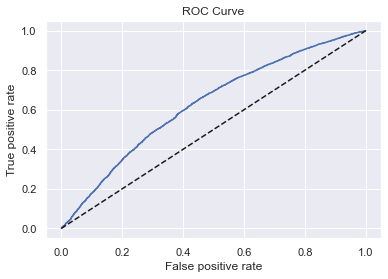

In [40]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');

In [41]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_ytest'], df_actual_predicted_probs['lgd_pred_proba'])

In [42]:
AUROC

0.6283579218188198

#### Model 2

In [43]:
reg1 = LogisticRegression_with_p_values(random_state=42)

In [44]:
reg1.fit(X_train1, y_train1)

In [45]:
pred1 = reg1.model.predict_proba(X_test1)

In [46]:
pred1 = pred1[:][:, 1]

In [47]:
feature_name1 = X_train1.columns.values

In [48]:
p_values1 = reg1.p_values
p_values1 = np.append(np.nan, np.array(p_values1))

In [49]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name1)
summary_table['Coefficients'] = np.transpose(reg1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = p_values1

In [50]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.392054e-04,NaN
1,funded_amnt,3.273555e-05,1.028835e-03
2,int_rate,-8.455834e-05,9.899137e-01
3,installment,-5.975063e-04,4.933231e-02
4,annual_inc,5.069239e-07,1.709018e-01
5,dti,-1.109444e-02,1.027072e-10
6,delinq_2yrs,-2.432398e-05,9.986845e-01
7,inq_last_6mths,2.224130e-04,9.819112e-01
8,mths_since_last_delinq,-1.590092e-03,2.380862e-03
9,mths_since_last_record,-1.118508e-03,7.679418e-02


#### Test the model

In [51]:
df_actual_predicted_probs1 = pd.concat([y_test_temp, pd.DataFrame(pred1)], axis=1)
df_actual_predicted_probs1.columns = ['lgd_ytest', 'lgd_pred_proba']
df_actual_predicted_probs1.index = y_test.index
df_actual_predicted_probs1

,lgd_ytest,lgd_pred_proba
0,0,0.445290
1,0,0.668549
2,1,0.554410
3,0,0.490417
4,1,0.811021
...,...,...
10804,0,0.509019
10805,1,0.526780
10806,0,0.706061
10807,0,0.509429


In [52]:
df_actual_predicted_probs1['pred'] = np.where(df_actual_predicted_probs1['lgd_pred_proba'] > tr, 1, 0)

In [53]:
pd.DataFrame(confusion_matrix(df_actual_predicted_probs1['lgd_ytest'], df_actual_predicted_probs1['pred']), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,1686,3030
Actual: True,1075,5018


In [54]:
print(classification_report(df_actual_predicted_probs1['lgd_ytest'], df_actual_predicted_probs1['pred']))

              precision    recall  f1-score   support

           0       0.61      0.36      0.45      4716
           1       0.62      0.82      0.71      6093

    accuracy                           0.62     10809
   macro avg       0.62      0.59      0.58     10809
weighted avg       0.62      0.62      0.60     10809



In [55]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs1['lgd_ytest'], df_actual_predicted_probs1['lgd_pred_proba'])

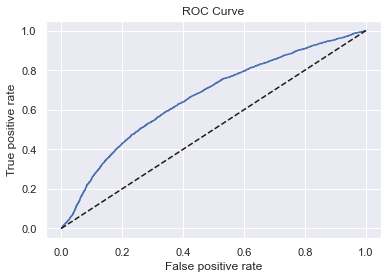

In [56]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');

In [57]:
AUROC = roc_auc_score(df_actual_predicted_probs1['lgd_ytest'], df_actual_predicted_probs1['lgd_pred_proba'])
AUROC

0.662139196149254

#### Saving the Model of choice - Model 2

In [58]:
import pickle

In [59]:
pickle.dump(reg1, open('model/lgd_model_stage_1.pkl', 'wb'))

### Stage 2 - Linear Regression

In [60]:
lgd_stage_2_data = data1[data1['recovery_rate_0_1'] == 1]

In [61]:
#data 1
X_train, X_test, y_train, y_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                   lgd_stage_2_data['recovery_rate'], random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
class LinearRegression1(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=True, copy_X=True, n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ /se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [65]:
X_train = X_train[data1_features_all]

In [67]:
X_train = X_train.drop(data1_ref_cat, axis=1)

In [85]:
X_train.shape

(18278, 46)

In [69]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

#### Test the Model

In [70]:
X_test = X_test[data1_features_all]

In [71]:
X_test = X_test.drop(data1_ref_cat, axis=1)

In [72]:
pred = linear_reg.predict(X_test)

In [73]:
y_test_temp = y_test
y_test_temp.reset_index(drop=True, inplace=True)

In [74]:
pd.concat([y_test_temp, pd.DataFrame(pred)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.321212
0,0.321212,1.000000


<AxesSubplot:xlabel='recovery_rate', ylabel='Density'>

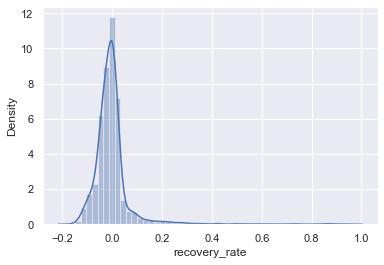

In [75]:
#look at the distribusion btw actual and predicted
sns.distplot(y_test - pred)

In [76]:
r2_score(y_test, pred)

0.10271680502627067

#### Save the model

In [77]:
pickle.dump(linear_reg, open('model/lgd_model_stage_2.pkl', 'wb'))

In [ ]:
#save Model data

### Combining the Stage 1 and Stage 2 to get Final LGD Model

In [78]:
#Run linear on all data regardless of if recovery is 0 or 1
pred_all = linear_reg.predict(X_test1)

In [79]:
pred_all

array([0.10595552, 0.07844998, 0.15701402, ..., 0.10635269, 0.15869608,
       0.16569585])

In [80]:
#Multiply first model and second model
pred_lgd = pred_all * pred1

In [81]:
pd.DataFrame(pred_lgd).describe()

,0
count,10809.000000
mean,0.063343
std,0.011691
min,-0.012038
25%,0.056575
50%,0.063621
75%,0.070595
max,0.134166


In [82]:
pred_lgd = np.where(pred_lgd < 0, 0, pred_lgd)
pred_lgd = np.where(pred_lgd > 1, 1, pred_lgd)

In [83]:
pd.DataFrame(pred_lgd).describe()

,0
count,10809.000000
mean,0.063345
std,0.011681
min,0.000000
25%,0.056575
50%,0.063621
75%,0.070595
max,0.134166
